# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while preserving as much variability as possible in the dataset. It transforms the data into a new coordinate system where the greatest variances are represented by the first few principal components.

## Key Concepts

1. **Dimensionality Reduction**: PCA reduces the number of variables in the dataset by projecting them onto a smaller set of uncorrelated variables called principal components. This helps in simplifying the dataset while retaining its essential information.

2. **Principal Components**: These are new variables that are linear combinations of the original variables. The first principal component captures the maximum variance in the data, the second principal component captures the maximum remaining variance, and so on.

3. **Orthogonality**: The principal components are orthogonal to each other, ensuring that there is no redundancy in the information captured by these components.

4. **Variance**: PCA arranges the principal components in order of decreasing variance. This means the first principal component accounts for the largest possible variance, the second principal component accounts for the next largest variance, and so on.

5. **Eigenvalues and Eigenvectors**: PCA relies on eigenvalue decomposition of the covariance matrix (or correlation matrix) of the data. The eigenvectors determine the direction of the principal components, while the eigenvalues determine their magnitude (variance explained).


## Steps Involved

1. **Standardization**: Often, the data is standardized (mean-centered and scaled) so that each feature contributes equally to the analysis.
2. **Covariance Matrix Computation**: Compute the covariance matrix of the data.
3. **Eigenvalue Decomposition**: Perform eigenvalue decomposition on the covariance matrix to find the eigenvalues and eigenvectors.
4. **Selecting Principal Components**: Select a subset of the eigenvectors (principal components) based on their corresponding eigenvalues.
5. **Transformation**: Transform the original data into the new coordinate system defined by the selected principal components.




### Import necessary model


In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action="ignore")
%matplotlib inline

#### Load Dataset

In [21]:
iris_dataset= pd.read_csv("Iris.csv")
iris_dataset.drop(columns=["Id"],inplace=True)
iris_dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We can see that there are four features per record. Its very hard to visualize these features. Lets do PCA for dimesnion reduction and compare the accuracy of model before and after PCA.

### Model Building Before PCA

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [23]:
features = iris_dataset.drop(columns=["Species"]).values
target_df = iris_dataset["Species"]

#scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(target_df)

y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, y_encoded, test_size=0.2, random_state=37)

In [25]:
model_before_PCA = LogisticRegression()
model_before_PCA.fit(X_train,y_train)

y_pred = model_before_PCA.predict(X_test)
train_acc = model_before_PCA.score(X_train,y_train)
test_acc = model_before_PCA.score(X_test,y_test)

#print(train_acc,train_acc)
print("Training score: ",train_acc)
print("Testing score: ",train_acc)

Training score:  0.975
Testing score:  0.975


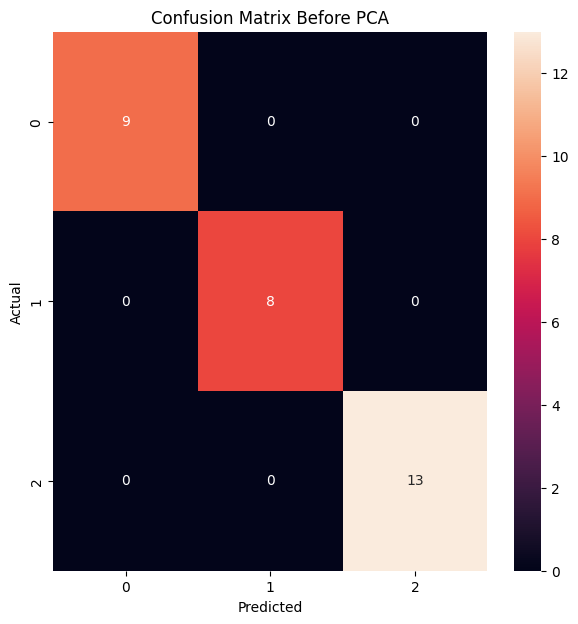

In [26]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Before PCA")
plt.show()

# Applying PCA and keep no of features = 2

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)
X_pca.shape


(150, 2)

We can see that we have reduced the number of features from 4 to 2.

#### Lets train model

In [30]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=37)

In [34]:
model_after_PCA = LogisticRegression()
model_after_PCA.fit(X_train_pca,y_train)

y_pred_after_PCA = model_after_PCA.predict(X_test_pca)
train_acc_after_PCA = model_after_PCA.score(X_train_pca,y_train)
test_acc_after_PCA = model_after_PCA.score(X_test_pca,y_test)

#print(train_acc,train_acc)
print("Training score: ",train_acc)
print("Testing score: ",train_acc)

Training score:  0.975
Testing score:  0.975


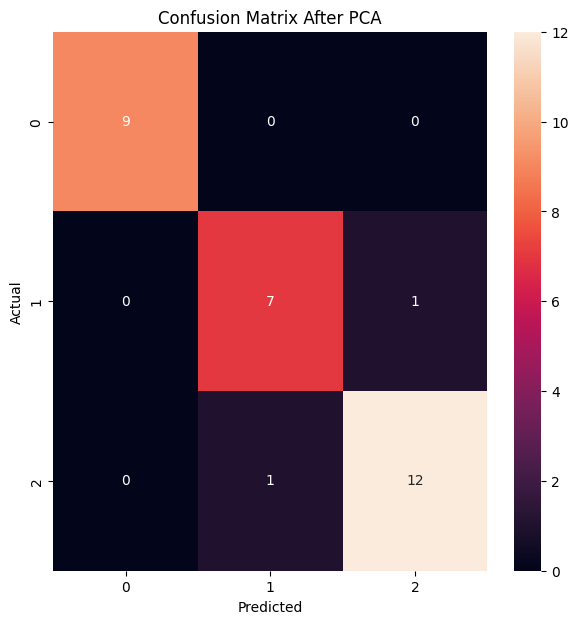

In [35]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(y_test,y_pred_after_PCA),annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix After PCA")
plt.show()

#### Visualize fetaures in 2D

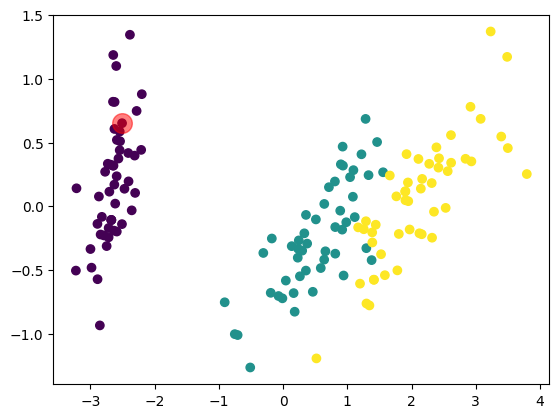

In [38]:


plt.scatter(
X_pca[:, 0], X_pca[:, 1], c=y_encoded)
plt.scatter([X_pca[10][0]], [X_pca[10][1]], s=[200], c=["r"], alpha=0.5)